# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [80]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,706,82,43,70,250,105,55,139,48,18,145,231,289,172,99,4,9,190,199
1,782,87,44,98,211,70,10,189,35,22,141,214,535,178,71,2,21,187,194
2,497,94,43,82,136,54,10,155,43,19,149,176,359,161,74,1,6,186,197
3,590,84,44,65,128,55,8,150,46,19,148,169,325,176,82,1,11,179,183
4,567,91,40,83,166,60,8,160,41,20,133,189,383,155,72,5,7,186,191
5,152,93,35,72,172,62,7,149,44,19,124,169,334,125,62,5,30,203,210
6,563,89,42,75,140,55,6,145,46,19,139,170,312,166,71,15,26,191,198
7,811,83,39,69,127,54,5,135,49,18,131,155,274,162,69,16,6,187,190
8,363,89,47,85,147,58,10,153,44,19,151,175,349,186,74,13,7,186,197
9,282,86,46,73,125,57,6,151,45,19,147,170,334,188,82,9,11,180,184


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,415.224044,93.533698,44.655738,81.839709,168.413479,61.659381,8.460838,168.009107,41.060109,20.504554,147.573770,187.537341,435.218579,173.797814,72.114754,6.513661,12.515483,189.142077,195.865209
std,241.548424,8.167345,6.067133,15.442494,32.517517,7.145682,4.173782,32.652421,7.575775,2.549953,14.306108,30.399124,174.080503,31.779480,6.584345,4.992905,9.128754,6.220246,7.429723
min,0.000000,76.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,147.000000,34.000000,19.000000,136.000000,168.000000,320.000000,149.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,404.000000,93.000000,44.000000,78.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,361.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,622.000000,100.000000,49.000000,96.000000,195.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,214.000000,573.000000,195.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,117.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,182.000000,287.000000,1018.000000,262.000000,99.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#scaler.inverse_transform()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [35]:
from sklearn.linear_model import LogisticRegressionCV

logregCV = LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logregCV.fit(X_train_scaled, y_train)
logregCV

LogisticRegressionCV(max_iter=500, multi_class='multinomial', solver='saga',
                     tol=0.001)

In [36]:
logregCV.score(X_train_scaled, y_train)

0.8178506375227687

In [37]:
from sklearn.metrics import f1_score, accuracy_score

X_test_scaled = scaler.transform(X_test)
predict_proba = logregCV.predict_proba(X_test_scaled)
y_pred = logregCV.predict(X_test_scaled)

f1_score(y_pred, y_test, average='macro'), accuracy_score(y_pred, y_test)

(0.8269641850602553, 0.8215488215488216)

In [38]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#! pip install scikit-plot

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

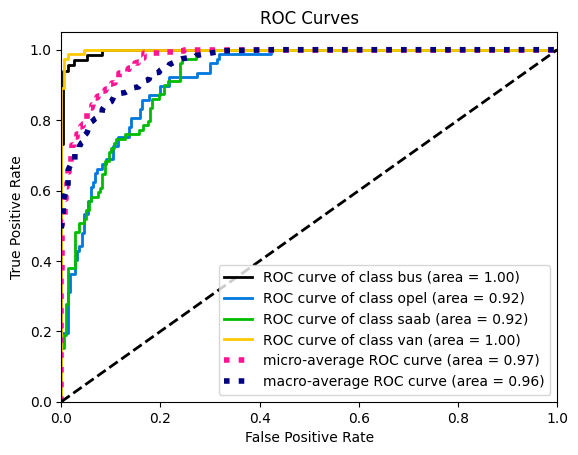

In [39]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, predict_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [40]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [41]:
frobenius_norm = []
for i in range(1,X_train.shape[-1]+1):
    pca = PCA(n_components=i)
    X_train_scaled_pca = pca.fit_transform(X_train_scaled)
    B = np.zeros(X_train_scaled.shape)
    B[:,:X_train_scaled_pca.shape[-1]] = X_train_scaled_pca
    fro = np.linalg.norm(X_train_scaled-B, ord='fro')/np.linalg.norm(B, ord='fro')
    frobenius_norm.append(fro)

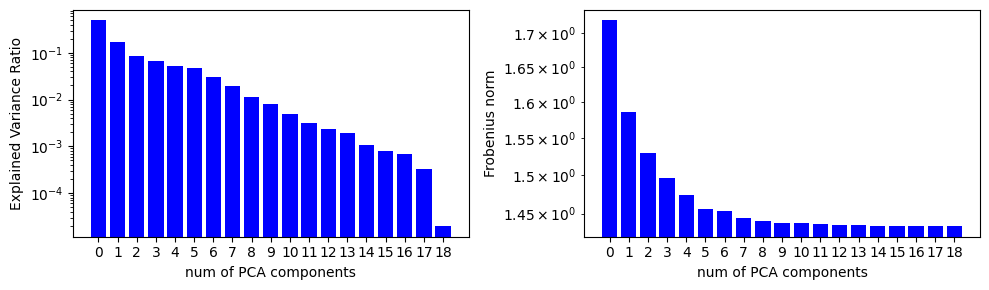

In [44]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

x = np.arange(0,19)
ax[0].bar(x, pca.explained_variance_ratio_, color='blue')
ax[0].set_xticks(x)
ax[0].set_yscale('log')
ax[0].set_xlabel('num of PCA components')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].bar(x, frobenius_norm, color='blue')
ax[1].set_xticks(x)
ax[1].set_yscale('log')
ax[1].set_xlabel('num of PCA components')
ax[1].set_ylabel('Frobenius norm')

fig.tight_layout()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [24]:
### YOUR CODE HERE
X_train_scaled_pca = pca.transform(X_train_scaled)
X_train_scaled_pca.shape
X_test_scaled_pca = pca.transform(X_test_scaled)
X_train_scaled_pca.shape, X_test_scaled_pca.shape

((549, 19), (297, 19))

In [205]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scale', StandardScaler()),
        ('reduce_dim', PCA()),
        ('model', LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))])
pipe

Pipeline(steps=[('scale', StandardScaler()), ('reduce_dim', PCA()),
                ('model',
                 LogisticRegressionCV(max_iter=500, multi_class='multinomial',
                                      solver='saga', tol=0.001))])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [26]:
### YOUR CODE HERE
pipe[1].n_components = 10
pipe[-1].penalty = 'l2'
pipe[-1].cv = None

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
predict_proba = pipe.predict_proba(X_train)

f1_score(y_pred, y_train, average='macro'), accuracy_score(y_pred, y_train)

(0.7134312719231364, 0.7231329690346083)

In [27]:
# TEST
y_pred = pipe.predict(X_test)
predict_proba = pipe.predict_proba(X_test)
f1_score(y_pred, y_test, average='macro'), accuracy_score(y_pred, y_test)

(0.7228399454426853, 0.7239057239057239)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

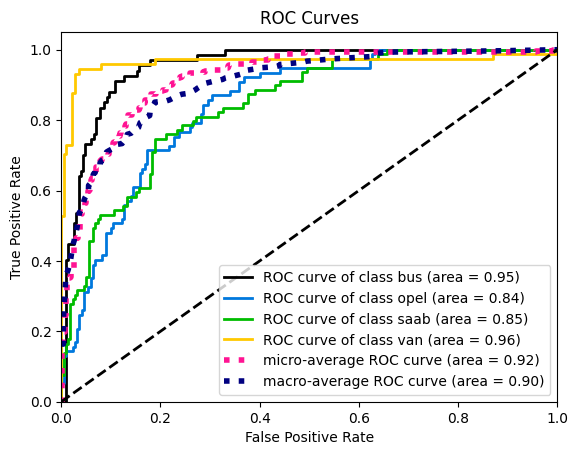

In [28]:
plot_roc(y_test, predict_proba)

In [29]:
f1_scores = []
accs = []
ncomp = range(1, X_test.shape[-1])

for nc in ncomp:
    pipe[1].n_components = nc
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
    predict_proba = pipe.predict_proba(X_train)
    f1 = f1_score(y_pred, y_train, average='macro')
    acc = accuracy_score(y_pred, y_train)
    f1_scores.append(f1)
    accs.append(acc)

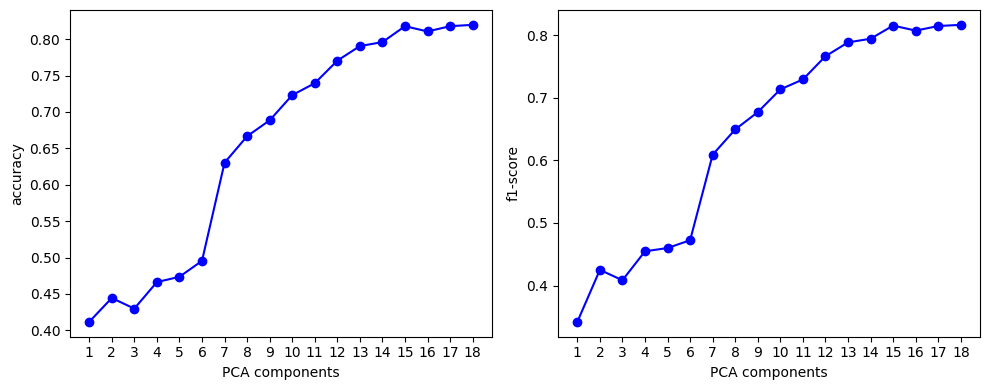

In [30]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(ncomp, accs, 'bo-')
ax[0].set_xlabel('PCA components')
ax[0].set_ylabel('accuracy')
ax[0].set_xticks(ncomp)

ax[1].plot(ncomp, f1_scores, 'bo-')
ax[1].set_xlabel('PCA components')
ax[1].set_ylabel('f1-score')
ax[1].set_xticks(ncomp)

fig.tight_layout()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [48]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(1.0, 0.7171717171717171)

In [49]:
f1_score(y_train, y_pred_train, average='macro'), f1_score(y_test, y_pred_test, average='macro')

(1.0, 0.727018412659145)

In [50]:
f1_score(y_train, y_pred_train, average='micro'), f1_score(y_test, y_pred_test, average='micro')

(1.0, 0.7171717171717171)

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(3,20), 'criterion': ['gini', 'entropy']}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-2)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 20)},
             scoring='accuracy')

In [90]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [52]:
best_tree = gs.best_estimator_

y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9234972677595629, 0.696969696969697)

In [53]:
f1_score(y_train, y_pred_train, average='macro'), f1_score(y_test, y_pred_test, average='macro')

(0.9215462591551009, 0.6971741007627769)

In [54]:
f1_score(y_train, y_pred_train, average='micro'), f1_score(y_test, y_pred_test, average='micro')

(0.9234972677595629, 0.696969696969697)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

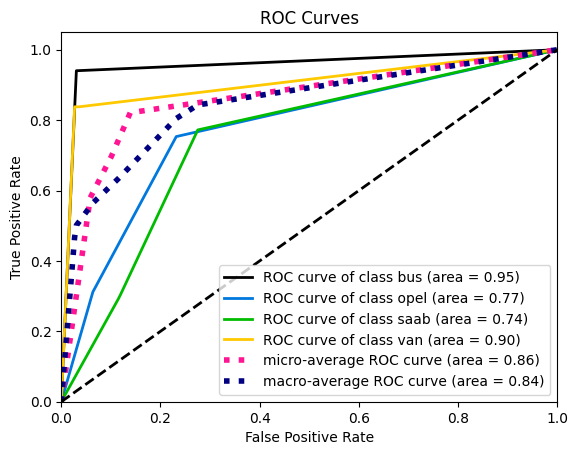

In [55]:
plot_roc(y_test, best_tree.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [135]:
# YOUR CODE HERE

In [136]:
from sklearn.ensemble import BaggingClassifier

In [137]:
accs_train = []
accs_test = []
f1_train = []
f1_test = []

N = range(1, 21, 1)
for n in N:
    bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=11), n_estimators=n).fit(X_train, y_train)
    y_pred_train = bagging_clf.predict(X_train)
    y_pred_test = bagging_clf.predict(X_test)
    accs_train.append(accuracy_score(y_train, y_pred_train))
    accs_test.append(accuracy_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train, average='macro'))
    f1_test.append(f1_score(y_test, y_pred_test, average='macro'))

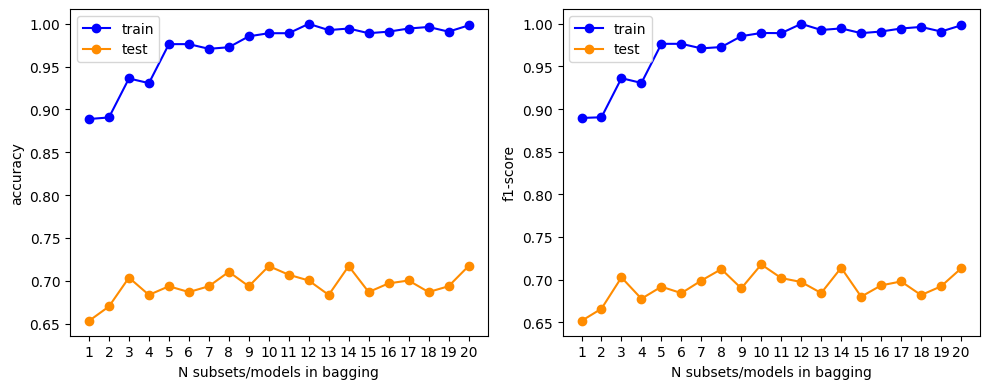

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(N, accs_train, 'bo-', label='train')
ax[0].plot(N, accs_test, 'o-', color='darkorange', label='test')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('N subsets/models in bagging')
ax[0].legend()
ax[0].set_xticks(N)

ax[1].plot(N, f1_train, 'bo-', label='train')
ax[1].plot(N, f1_test, 'o-', color='darkorange', label='test')
ax[1].set_ylabel('f1-score')
ax[1].set_xlabel('N subsets/models in bagging')
ax[1].legend()
ax[1].set_xticks(N)

fig.tight_layout()

**My answers:**

* According to the graph, we don't need too many subsets in bagging, because it make no sense to average over alike models (some of subsets inevitably will be alike -> trained models are also alike)

* It is possible to train a more simple decent model with close `accuracy/f1-score/other metric` using bagging 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [141]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [143]:
accs_train = []
accs_test = []
f1_train = []
f1_test = []

N = range(1, 21, 1)
for n in N:
    bagging_clf = RandomForestClassifier(n_estimators=n, criterion='entropy', max_depth=11).fit(X_train, y_train)
    y_pred_train = bagging_clf.predict(X_train)
    y_pred_test = bagging_clf.predict(X_test)
    accs_train.append(accuracy_score(y_train, y_pred_train))
    accs_test.append(accuracy_score(y_test, y_pred_test))
    f1_train.append(f1_score(y_train, y_pred_train, average='macro'))
    f1_test.append(f1_score(y_test, y_pred_test, average='macro'))

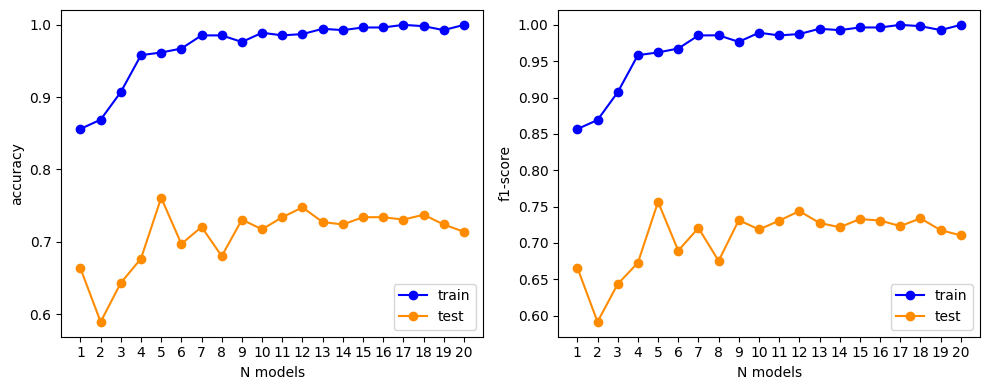

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(N, accs_train, 'bo-', label='train')
ax[0].plot(N, accs_test, 'o-', color='darkorange', label='test')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('N models')
ax[0].legend()
ax[0].set_xticks(N)

ax[1].plot(N, f1_train, 'bo-', label='train')
ax[1].plot(N, f1_test, 'o-', color='darkorange', label='test')
ax[1].set_ylabel('f1-score')
ax[1].set_xlabel('N models')
ax[1].legend()
ax[1].set_xticks(N)

fig.tight_layout()

**My answer:**

* Optimal number of models is a little bit higher compared to `Bagging` approach. This happens because of *feature selection* in case of `RandomForest`

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [202]:
# YOUR CODE HERE

In [212]:
logreg_pipe = Pipeline(
    [
        ('scale', StandardScaler()),
        ('logreg', LogisticRegressionCV(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)),
    ]
)

models = {
    'Logistic Regression': logreg_pipe,
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=11),
    'Random Forest': RandomForestClassifier(n_estimators=15), # ~approximately since it's an educational task
}

In [213]:
np.random.seed(42)
perm = np.random.permutation(X_train.shape[0])
n_chunks = 10
chunk_size = X_train.shape[0]//n_chunks

stats = {key: np.array([]).reshape(-1,2) for key in models.keys()}

for name, model in models.items():
    for i in range(1,1+n_chunks):
        xt, yt = X_train[perm][:i*chunk_size], y_train[perm][:i*chunk_size] 
        m = model.fit(xt, yt)
        y_pred = m.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        stats[name] = np.vstack((stats[name], np.array([acc, f1]).reshape(1,-1)))

C:\Users\msi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\msi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\msi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\msi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


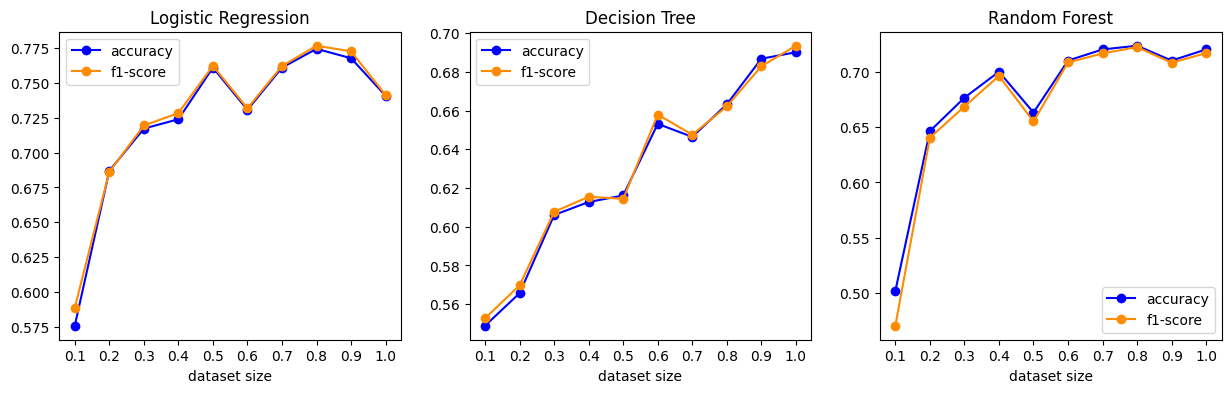

In [214]:
fig, ax = plt.subplots(1, len(stats), figsize=(15, 4))

nch = np.arange(1, 11)/10

for i, name in enumerate(models.keys()):
    accs, f1s = stats[name][:, 0], stats[name][:, 1]
    ax[i].plot(nch, accs, 'bo-', label='accuracy', )
    ax[i].plot(nch, f1s, 'o-', color='darkorange', label='f1-score')
    ax[i].set_xlabel('dataset size')
    ax[i].set_title(name)
    ax[i].set_xticks(nch)
    ax[i].legend()

**My answer:**

* Decision tree seems more sensible to `train` size. Apparently, this is due to its higher dendency to overfitting compared to other models